<a href="https://colab.research.google.com/github/baek0618/colab_test/blob/master/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

!pwd  #/content 
!ls -al /content/drive/'My Drive'/'Colab Notebooks'/drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
/content
total 14
-rw------- 1 root root 6972 Nov  3 06:27 images.jpg
-rw------- 1 root root 6547 Nov  3 07:19 야도란.png


In [0]:
!ls -al /content/drive/'My Drive'/vinzip/baek/cifar10

total 41
drwx------ 2 root root  4096 Nov  5 15:58 test
-rw------- 1 root root  3000 Nov  5 16:34 test_lb.csv
drwx------ 2 root root  4096 Nov  5 15:58 train
-rw------- 1 root root 30000 Nov  5 16:34 train_lb.csv


In [4]:
#loder2.pyimport os
import re
import cv2
import numpy  as  np
import csv
import  random

def image_load(path):
    print(path)
    file_list = os.listdir(path)
    file_name = []
    cnt=0
    
    for i in file_list:
      cnt+=1
      print('\r', '첫 번째 : ', cnt, '/',len(file_list), end='') 
      a = int(re.sub('[^0-9]' ,'' ,i))
      file_name.append(a)
      
    file_name.sort()
    data  = []
    cnt=0
    for i in file_name:
      cnt+=1
      print('\r', '두 번째 : ', cnt, '/',len(file_name), end='') 
      file = path + str(i) + '.png'
      data.append(file)
        
    image = []
    cnt=0
    for j in data:
      cnt+=1
      if (cnt > 2000):
        break
      print('\r', '마지막 : ', cnt, '/',len(data), end='')
      img = cv2.imread(j)
      image.append(img)
    return np.array(image)

def label_load(path):
    file = open(path)
    labeldata = csv.reader(file)
    labellist = []

    for i in labeldata:
        labellist.append(i)

    label = np.array(labellist)
    label = label.astype(int)
    label = np.eye(10)[label]
    label = np.squeeze(label, axis=1)

    return label


def shuffle_batch(data_list, label):
    x= np.arange(len(data_list))
    random.shuffle(x)
    data_list2 = data_list[x]
    label2 = label[x]
    return data_list2, label2

def next_batch(data_list,label,idx,batch_size):

    batch1 = data_list[idx * batch_size:idx * batch_size + batch_size]

    label2 = label[idx * batch_size:idx * batch_size + batch_size]

    return batch1, label2

print('loader')

loader


In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import os
#import loader3


train_image = '/content/drive/My Drive/vinzip/baek/cifar10/train/'
train_label = '/content/drive/My Drive/vinzip/baek/cifar10/train_lb.csv'

test_image = '/content/drive/My Drive/vinzip/baek/cifar10/test/'
test_label = '/content/drive/My Drive/vinzip/baek/cifar10/test_lb.csv'

print("LOADING DATA")
# cifar10 데이터 로드

trainY = label_load(train_label)
testY = label_load(test_label)

trainX = image_load(train_image)
print('이미지 로드..1 ')
print('이미지 로드..2 ')
testX = image_load(test_image)


tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32) #drop out을 쓴다.(무엇을뺄지)

# batchnorm switch
isTrain = tf.placeholder(tf.bool)

W1 = tf.Variable(tf.random_normal([3, 3, 3, 32], stddev=0.01)) 
#W1 = tf.get_variable(name='W1', shape=[3,3,3,32], initializer=tf.contrib.layers.variance_scaling_initializer())
L1 = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='SAME')
z1 = tf.contrib.layers.batch_norm(L1, is_training=isTrain) # 배치 정규화
L1 = tf.nn.relu(z1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
#W2 = tf.get_variable(name='W2', shape=[3,3,32,64], initializer=tf.contrib.layers.variance_scaling_initializer())
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
z2 = tf.contrib.layers.batch_norm(L2, is_training=isTrain) # 배치 정규화
L2 = tf.nn.relu(z2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([32 * 32 * 64, 256], stddev=0.01))
#W3 = tf.get_variable(name='W3', shape=[8*8*64,256], initializer=tf.contrib.layers.variance_scaling_initializer())
L3 = tf.reshape(L2, [-1, 32 * 32 * 64])
L3 = tf.matmul(L3, W3)
z3 = tf.contrib.layers.batch_norm(L3, is_training=isTrain) # 배치 정규화
L3 = tf.nn.relu(z3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 2], stddev=0.01))
#W4 = tf.get_variable(name='W4', shape=[256,2], initializer=tf.contrib.layers.variance_scaling_initializer())
y2 = tf.matmul(L3,W4) # 내적
y_hat = tf.nn.softmax(y2)

#예측값 출력
y_predict = tf.argmax(y_hat, axis = 1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(y_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis = 1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
   # Ensures that we execute the update_ops before performing the train_step
  Train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

  print('변수 초기화')
 # 변수 초기화
  init = tf.global_variables_initializer()

  train_acc_list = []
  test_acc_list = []

  with tf.Session() as sess:
    print('세션생성')
    sess.run(init)

    for i in range(10000):
      print('for문',i)
      trainX, trainY = shuffle_batch(trainX, trainY)
      testX, testY = shuffle_batch(testX, testY)

      train_xs, train_ys = next_batch(trainX,trainY,0,40) # 훈련 데이터
      test_xs, test_ys = next_batch(testX, testY, 0, 40) # 테스트 데이터


      sess.run(Train, feed_dict={x : train_xs, y_onehot : train_ys, keep_prob: 0.9, isTrain:True})

      if i % 600 == 0:

        train_acc = sess.run(acc, feed_dict={x: train_xs, y_onehot: train_ys, keep_prob: 1.0,isTrain:False})
        test_acc = sess.run(acc, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0, isTrain:False})

        print(i / 600 + 1, 'ecpo train acc:', train_acc, ', test acc:', test_acc)

        train_acc_list.append(train_acc)  # 10000/600 개  16개 # 정확도가 점점 올라감
        test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감

 # 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show() 
   

LOADING DATA
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
/content/drive/My Drive/vinzip/baek/cifar10/train/
 두 번째 :  3535 / 10000

KeyboardInterrupt: ignored

In [0]:
from random import uniform 
import time 

def black_box(): 
    i = 1 
    while True: 
      print ('Iteration', i, 'Score:', uniform(0, 1)) 
      time.sleep(1) 
      i += 1 
black_box()

Iteration 1 Score: 0.30338628007355406
Iteration 2 Score: 0.7550738631710936
Iteration 3 Score: 0.840577237391534
Iteration 4 Score: 0.8556090564350779
Iteration 5 Score: 0.19454473296539943
Iteration 6 Score: 0.32819303621180607


KeyboardInterrupt: ignored

LOADING DATA
/content/drive/My Drive/vinzip/baek/cifar10/train/
 마지막 :  2000 / 10000이미지 로드..1 
이미지 로드..2 
/content/drive/My Drive/vinzip/baek/cifar10/test/
 마지막 :  1000 / 10001.0 ecpo train acc: 0.19 , test acc: 0.07
2.0 ecpo train acc: 1.0 , test acc: 0.14
3.0 ecpo train acc: 1.0 , test acc: 0.14
4.0 ecpo train acc: 1.0 , test acc: 0.15
5.0 ecpo train acc: 1.0 , test acc: 0.16
6.0 ecpo train acc: 1.0 , test acc: 0.16
7.0 ecpo train acc: 1.0 , test acc: 0.16
8.0 ecpo train acc: 1.0 , test acc: 0.15
9.0 ecpo train acc: 1.0 , test acc: 0.14
10.0 ecpo train acc: 1.0 , test acc: 0.15
11.0 ecpo train acc: 1.0 , test acc: 0.16
12.0 ecpo train acc: 1.0 , test acc: 0.17
13.0 ecpo train acc: 0.1 , test acc: 0.06
14.0 ecpo train acc: 0.1 , test acc: 0.06
15.0 ecpo train acc: 0.1 , test acc: 0.06
16.0 ecpo train acc: 0.1 , test acc: 0.06
17.0 ecpo train acc: 0.1 , test acc: 0.06


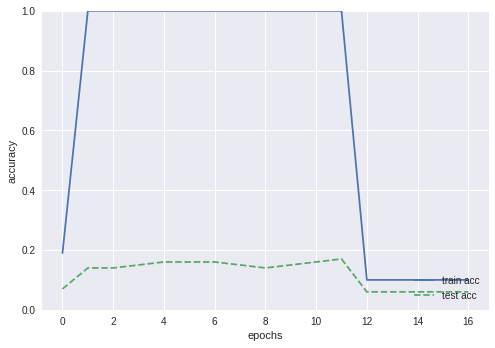

In [6]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import os
#import loader3


train_image = '/content/drive/My Drive/vinzip/baek/cifar10/train/'
train_label = '/content/drive/My Drive/vinzip/baek/cifar10/train_lb.csv'

test_image = '/content/drive/My Drive/vinzip/baek/cifar10/test/'
test_label = '/content/drive/My Drive/vinzip/baek/cifar10/test_lb.csv'

print("LOADING DATA")
# cifar10 데이터 로드

trainY = label_load(train_label)
testY = label_load(test_label)

trainX = image_load(train_image)
print('이미지 로드..1 ')
print('이미지 로드..2 ')
testX = image_load(test_image)

tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([3, 3, 3, 32], stddev=0.01))
L1 = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='SAME')

L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

W3 = tf.Variable(tf.random_normal([8 * 8 * 64, 256], stddev=0.01))
L3 = tf.reshape(L2, [-1, 8 *8 * 64])
L3 = tf.matmul(L3, W3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.dropout(L3, keep_prob)

W4 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
y2 = tf.matmul(L3,W4) # 내적
y_hat = tf.nn.softmax(y2)

#예측값 출력
y_predict = tf.argmax(y_hat, axis = 1)

# 라벨을 저장하기 위한 변수 생성
y_onehot = tf.placeholder("float",[None,10])
y_label = tf.argmax(y_onehot, axis = 1)

# 정확도를 출력하기 위한 변수 생성
correct_prediction = tf.equal(y_predict, y_label)
acc = tf.reduce_mean(tf.cast(correct_prediction,"float"))

# 교차 엔트로피 오차 함수
loss = -tf.reduce_sum(y_onehot * tf.log(y_hat), axis = 1)

# SGD 경사 감소법
# optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.05)

update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(update_ops):
    # Ensures that we execute the update_ops before performing the train_step
    Train = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


# 변수 초기화
init = tf.global_variables_initializer()

train_acc_list = []
test_acc_list = []

with tf.Session() as sess:

    sess.run(init)

    for i in range(10000):
     
        train_xs, train_ys = next_batch(trainX,trainY,0,100) # 훈련 데이터
        test_xs, test_ys = next_batch(testX, testY, 0, 100) # 테스트 데이터
               #train_xs, train_ys = mnist.train.next_batch(100) # 훈련 데이터
        #test_xs, test_ys = mnist.test.next_batch(100) # 테스트 데이터
                #train_xs = train_xs.reshape(-1,28,28,1)
        #test_xs = test_xs.reshape(-1,28,28,1)   #cifar10은 사진이라 필요없다

        sess.run(Train, feed_dict={x : train_xs, y_onehot : train_ys, keep_prob: 0.9})

        if i % 600 == 0:

            train_acc = sess.run(acc, feed_dict={x: train_xs, y_onehot: train_ys, keep_prob: 1.0})
            test_acc = sess.run(acc, feed_dict={x: test_xs, y_onehot: test_ys, keep_prob: 1.0})

            print(i / 600 + 1, 'ecpo train acc:', train_acc, ', test acc:', test_acc)

            train_acc_list.append(train_acc)  # 10000/600 개  16개 # 정확도가 점점 올라감
            test_acc_list.append(test_acc)  # 10000/600 개 16개 # 정확도가 점점 올라감

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show() 
